# Fitting the final model
<u>Tests using the following models :</u>
* Linear regression
* Random forest regressor
* Ridge and Lasso Regularization (add on to linear modelling?)

<u> Tests using the following variables:</u>
* Weather variables (rain, temperature, windspeed)
* Time variables (Day of week, month, year, time of day, public holiday)
* Sensor environment variables:
    * Sensor_id
    * Betweenness of the street 
    * Buildings in proximity to the sensor
    * Landmarks in proximity to the sensor  
    * Furniture in proximity to the sensor    
    * Lights in proximity to the sensor   

In [1]:
import copy
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, mean_squared_error,r2_score, accuracy_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
import time as thetime
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier, XGBRegressor
from time import time
from sklearn.inspection import permutation_importance
from scipy import stats

from eli5.sklearn import PermutationImportance
from sklearn.model_selection import cross_val_predict

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from Functions import *
import joblib

## Prepare data for modelling

In [2]:
buffer_size_m=400
input_csv ="../Cleaned_data/FormattedDataForModelling/formatted_data_for_modelling_allsensors_{}.csv".format(buffer_size_m)
Xfull, Yfull,data_time_columns = prepare_x_y_data(input_csv)

### Choose which month_num and weekday_num option to include

In [3]:
# If using the dummy variables
# Xfull.drop(['Cos_month_num', 'Sin_month_num', 'Cos_weekday_num', 'Sin_weekday_num'], axis=1)
# If using the cyclical variables
Xfull.drop(['Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12'], axis=1, inplace = True)

In [4]:
Xfull.columns

Index(['year', 'Temp', 'Humidity', 'Pressure', 'Rain', 'WindSpeed',
       'Rainfall amount (millimetres)', 'public_holiday', 'school_holiday',
       'betweenness', 'lights', 'memorials', 'trees', 'transport_stops',
       'bus-stops', 'tram-stops', 'metro-stations', 'taxi-ranks',
       'big-car-parks', 'street_inf_Bicycle Rails', 'street_inf_Bollard',
       'street_inf_Drinking Fountain', 'street_inf_Floral Crate/Planter Box',
       'street_inf_Horse Trough', 'street_inf_Information Pillar',
       'street_inf_Litter Bin', 'street_inf_Seat', 'street_inf_Tree Guard',
       'landmarks_Community Use', 'landmarks_Mixed Use',
       'landmarks_Place Of Assembly', 'landmarks_Place of Worship',
       'landmarks_Retail', 'landmarks_Transport', 'landmarks_Education Centre',
       'landmarks_Office', 'street_inf_Hoop', 'street_inf_Picnic Setting',
       'landmarks_Leisure/Recreation', 'street_inf_Barbeque',
       'landmarks_Specialist Residential Accommodation',
       'landmarks_Vacan

## Fit the final model
Random Forest with a buffer size of 500m was the best performing model from CV  
For this, we use all of the data

In [5]:
# Fit the final model
rf_model_pipeline1 = Pipeline(steps=[['scaler',StandardScaler()],
                                    ['rf_regressor',RandomForestRegressor(random_state = 1, n_jobs = 32)]])
rf_model_pipeline1.fit(Xfull, Yfull)
print("saving pickled file")
# Save to pickled file
filename = 'Results/FinalModels/rf_model_pipeline1_{}.pkl'.format(buffer_size_m)
joblib.dump(rf_model_pipeline1, filename)

saving pickled file


['Results/FinalModels/rf_model_pipeline1_400.pkl']

In [5]:
# Fit the final model
rf_model_pipeline2 = Pipeline(steps=[['scaler',StandardScaler()],
                                    ['rf_regressor',RandomForestRegressor(random_state = 2, n_jobs = 32)]])
rf_model_pipeline2.fit(Xfull, Yfull)
print("saving pickled file")
# Save to pickled file
filename = 'Results/FinalModels/rf_model_pipeline2_{}.pkl'.format(buffer_size_m)
joblib.dump(rf_model_pipeline2, filename)

saving pickled file


['Results/FinalModels/rf_model_pipeline2_400.pkl']

In [5]:
# Fit the final model
rf_model_pipeline3 = Pipeline(steps=[['scaler',StandardScaler()],
                                    ['rf_regressor',RandomForestRegressor(random_state = 2, n_jobs = 32)]])
rf_model_pipeline3.fit(Xfull, Yfull)
print("saving pickled file")
# Save to pickled file
filename = 'Results/FinalModels/rf_model_pipeline3_{}.pkl'.format(buffer_size_m)
joblib.dump(rf_model_pipeline3, filename)

saving pickled file


['Results/FinalModels/rf_model_pipeline3_400.pkl']

In [6]:
Xfull.to_csv('Results/FinalModels/Xfull_rf_model_pipeline1_{}.csv'.format(buffer_size_m), index=False)
Yfull_df=pd.DataFrame(Yfull)
Yfull_df.to_csv('Results/FinalModels/Yfull_rf_model_pipeline1_{}.csv'.format(buffer_size_m), index=False)

In [ ]:
len(Xfull.columns)

In [10]:
# pi_1, pi_1_raw = find_permutation_importance(rf_model_pipeline1['rf_regressor'], Xfull, Yfull, n_iter=3)    
# pi_2, pi_2_raw = find_permutation_importance(rf_model_pipeline2['rf_regressor'], Xfull, Yfull, n_iter=3)     
pi_3, pi_3_raw = find_permutation_importance(rf_model_pipeline3['rf_regressor'], Xfull, Yfull, n_iter=3)  

In [9]:
# gi_1 = find_gini_importance(Xfull,rf_model_pipeline1['rf_regressor'])    
# gi_2 = find_gini_importance(Xfull,rf_model_pipeline2['rf_regressor'])   
gi_3 = find_gini_importance(Xfull,rf_model_pipeline3['rf_regressor'])   

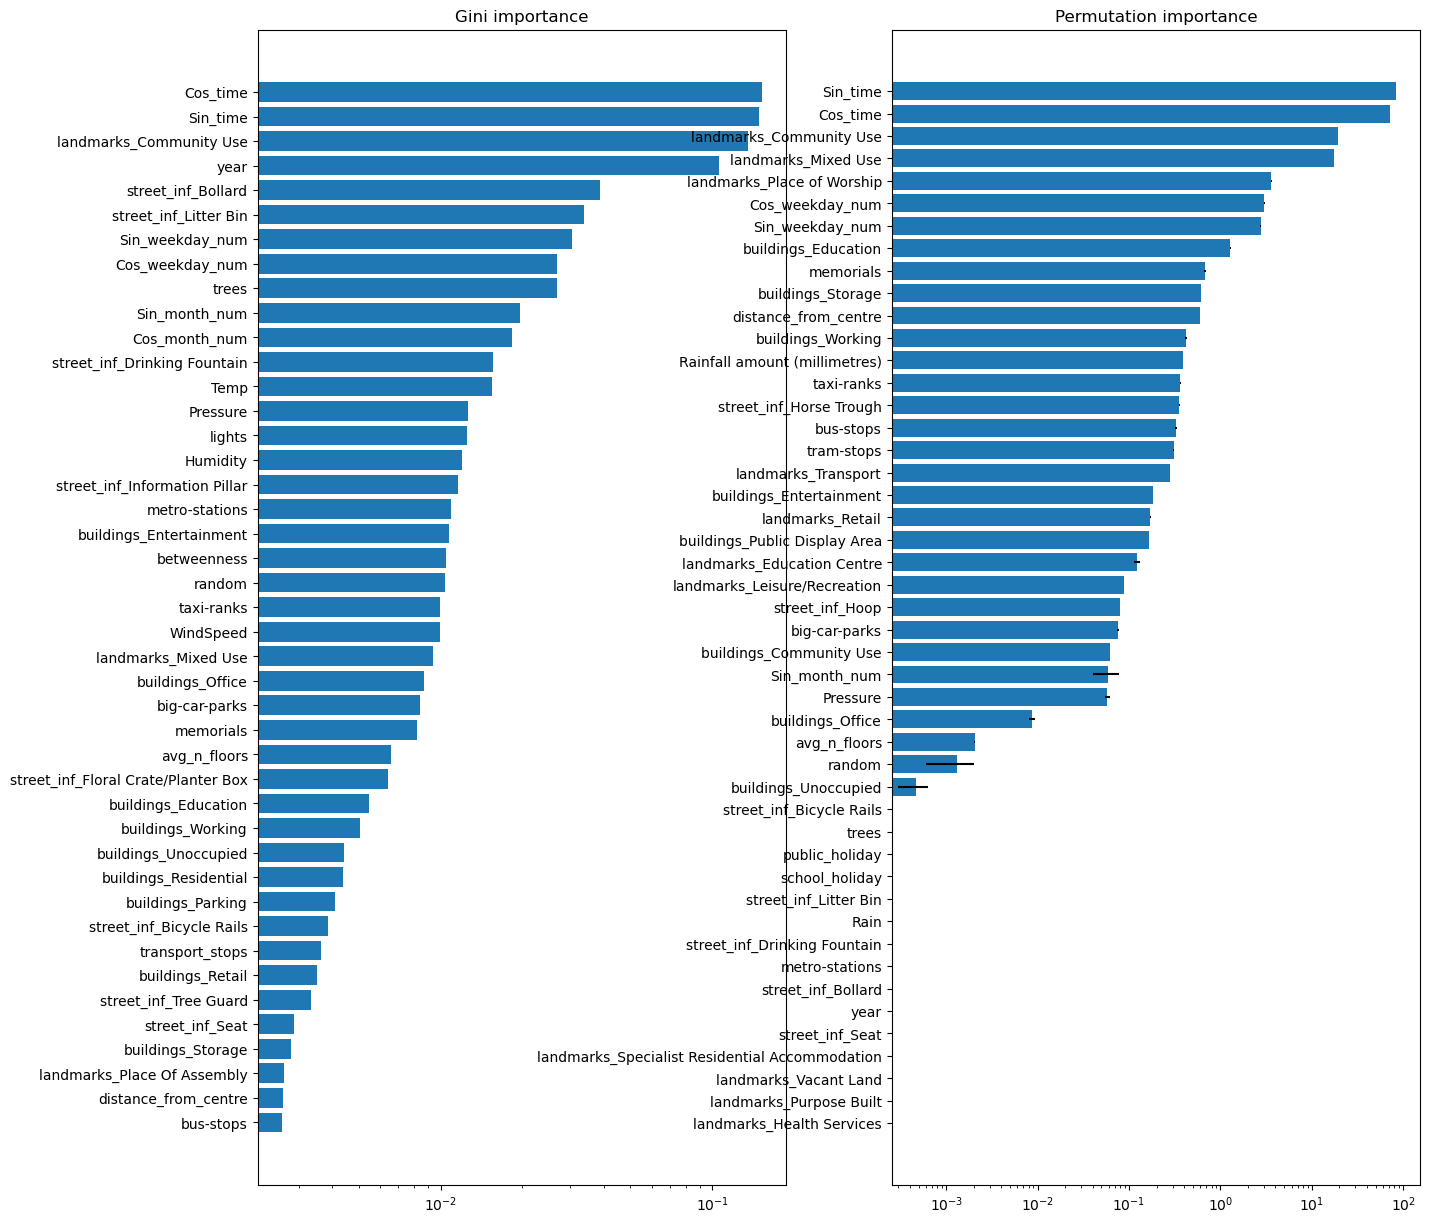

In [8]:
fig, axs = plt.subplots(ncols = 2, figsize=(15,15))
plot_compare_importances(axs, gi_3, pi_3, log_scale = True, above_random_cat='random_cat')   
fig.savefig("Results/Figs/AssessingFinalModel/FeatureImportances3_log.PNG")

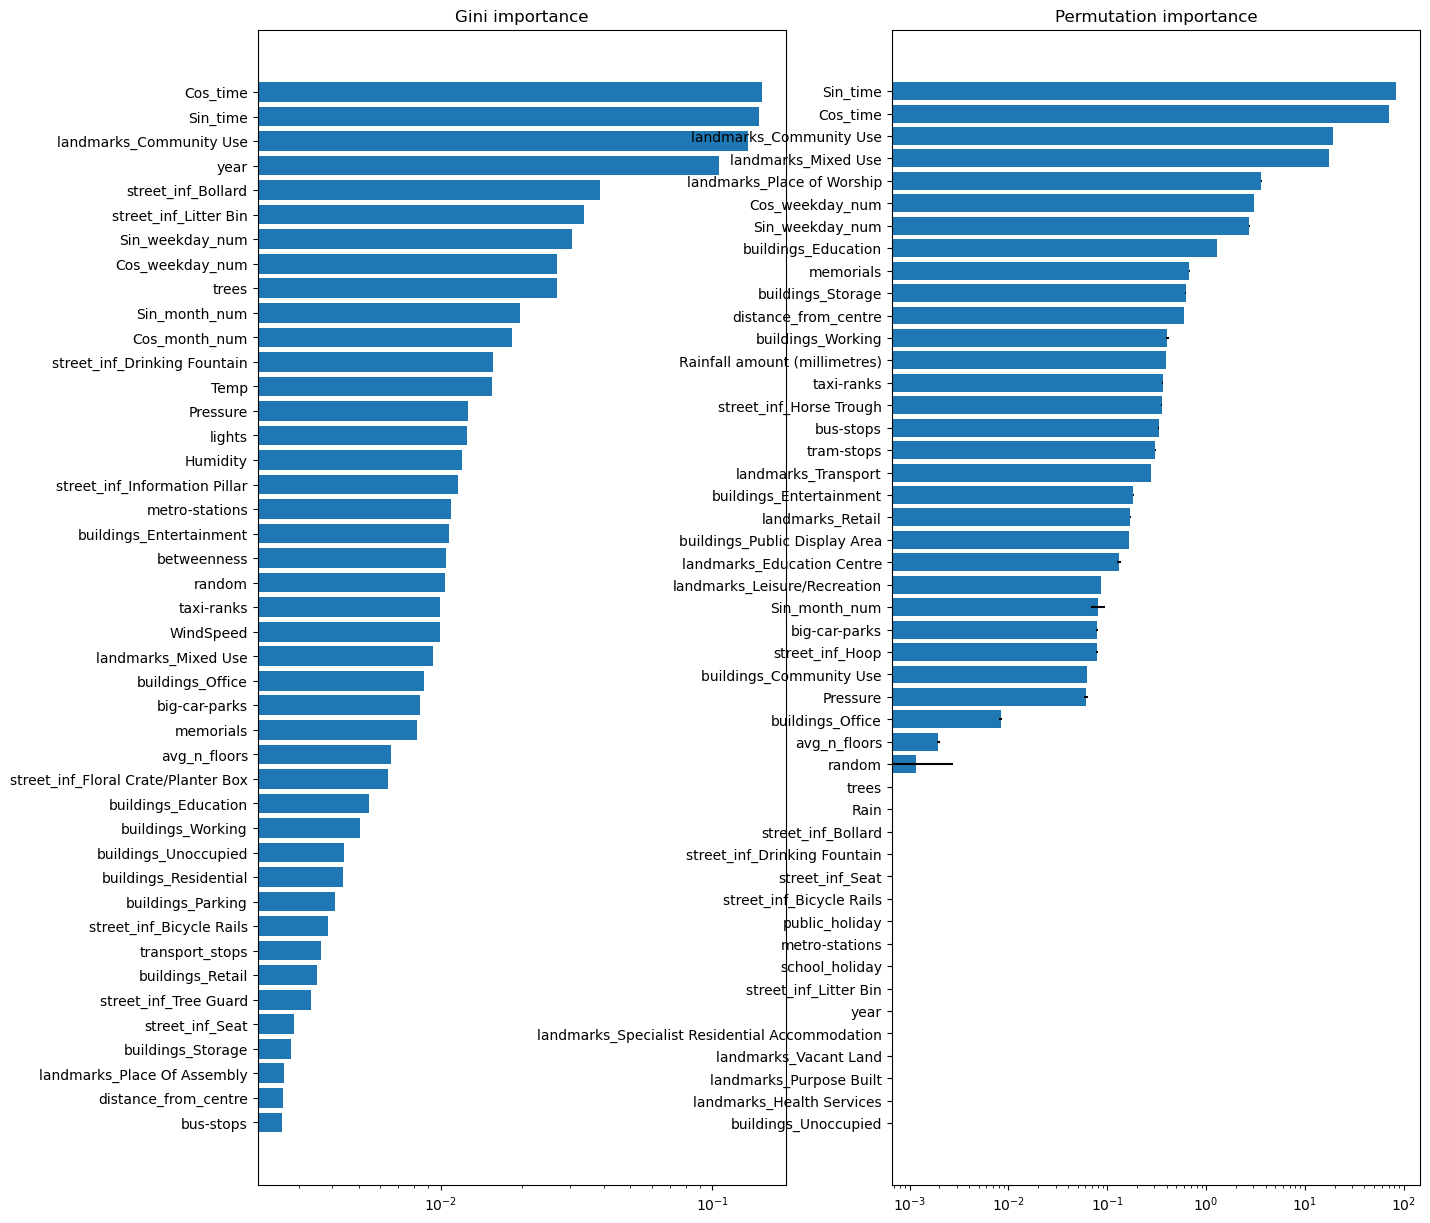

In [11]:
fig, axs = plt.subplots(ncols = 2, figsize=(15,15))
plot_compare_importances(axs, gi_3, pi_3, log_scale = True, above_random_cat='random_cat')   
fig.savefig("Results/Figs/AssessingFinalModel/FeatureImportances3_log.PNG")